# ノック81 : 画像データ読み込み

In [1]:
import cv2

In [2]:
img = cv2.imread('img/img01.jpg')
height, width = img.shape[:2]
print('画像幅：' + str(width))
print('画像高さ：' + str(height))
cv2.imshow('img', img)
cv2.waitKey(0)

画像幅：1920
画像高さ：1440


-1

# ノック82：映像データ読み込み

In [3]:
cap = cv2.VideoCapture('mov/mov01.avi')
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print('画像幅：' + str(width))
print('画像高さ：' + str(height))
print('総フレーム数：' + str(count))
print('FPS：' + str(fps))

画像幅：1920.0
画像高さ：1440.0
総フレーム数：401.0
FPS：30.0


In [ ]:
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows

# ノック83：映像を画像に分割して保存

In [ ]:
cap = cv2.VideoCapture('mov/mov01.avi')
num = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow('frame', frame)
        filepath = 'snapshot/snapshot_' + str(num) + '.jpg'
        cv2.imwrite(filepath, frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    num = num + 1
cap.release()
cv2.destroyAllWindows

# ノック84：人の検出

In [1]:
import cv2

In [6]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride' : (8, 8),
             'padding' : (32, 32),
             'scale' : 1.05,
             'hitThreshold' : 0,
             'finalThreshold' : 5}

In [7]:
img = cv2.imread('img/img01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r =hog.detectMultiScale(gray, **hogParams)

if (len(human)>0):
    for (x, y, w, h) in human:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 255, 255), 3)
cv2.imshow('img', img)
cv2.waitKey(0)

-1

# ノック85：顔検出

In [8]:
import cv2

In [9]:
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

In [10]:
img = cv2.imread('img/img02.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(gray, minSize = (50, 50))

In [11]:
face_list

array([[1051,   87,  182,  182]], dtype=int32)

In [13]:
for (x, y, w, h) in face_list:
    color = (0, 0, 225)
    pen_w = 3
    cv2.rectangle(img, (x,y), (x+w, y+h), color, thickness = pen_w)
cv2.imshow('img', img)
cv2.imwrite('temp.jpg', img)
cv2.waitKey(0)

-1

# ノック86：顔のランドマーク検出

In [59]:
import cv2
import dlib
import math

In [60]:
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [61]:
img = cv2.imread("img/img02.jpg")
dets = detector(img, 1)

In [62]:
for k, d in enumerate(dets):
    shape = predictor(img, d)
    
    color_f = (0, 0, 225)
    color_l_out = (225, 0, 0)
    color_l_in = (0, 225, 0)
    
    line_w = 3
    circle_r = 3
    fontType = cv2.FONT_HERSHEY_SIMPLEX
    fontSize = 1
    
    cv2.rectangle(img,
                  (d.left(), d.top()),
                  (d.right(), d.bottom()),
                  color_f,
                  line_w)
    cv2.putText(img, str(k),
                (d.left(), d.top()),
                fontType,
                fontSize,
                color_f,
                line_w)
    
    num_of_points_out = 17
    num_of_points_in = shape.num_parts - num_of_points_out
    gx_out = 0
    gy_out = 0
    gx_in = 0
    gy_in = 0
    
    for shape_point_count in range(shape.num_parts):
        shape_point = shape.part(shape_point_count)
        #print('顔器官No.{} 座標位置：({}, {})'.format(shape_point_count, shape_point.x, shape_point.y))
        
        if shape_point_count < num_of_points_out:
            cv2.circle(img,
                       (shape_point.x, shape_point.y),
                       circle_r,
                       color_l_out,
                       line_w)
            gx_out = gx_out + shape_point.x/num_of_points_out
            gy_out = gy_out + shape_point.y/num_of_points_out
            # 輪郭の各点の座標の平均値
        else:
            cv2.circle(img,
                       (shape_point.x, shape_point.y),
                       circle_r,
                       color_l_in,
                       line_w)
            gx_in = gx_in + shape_point.x/num_of_points_in
            gy_in = gy_in + shape_point.y/num_of_points_in
            # 顔の各要素の点の座標の平均値
            
        #print(gx_out, gx_in)
            
    cv2.circle(img,
               (int(gx_out), int(gy_out)),
               circle_r,
               (0, 0, 255),
               line_w)
    cv2.circle(img,
               (int(gx_in), int(gy_in)),
               circle_r,
               (0, 0, 0),
               line_w)
        
    print(gx_in, gx_out, (gx_in - gx_out), d.right(), d.left(), (d.right() - d.left()), (2*(gx_out - gx_in)) / (d.right() - d.left()))
    theta = math.asin(2 * (gx_in - gx_out) / (d.right() - d.left())) # (d.right() - d.left()) で顔を囲む矩形の横幅
    radian = theta * 180 / math.pi
    print('顔方位：{} (角度：{}度)'.format(theta, radian))

    if radian < 0:
        textPrefix = '    left'
    else:
        textPrefix = '    right'
    textShow = textPrefix + str(round(abs(radian), 1)) + 'deg.'
    cv2.putText(img,
                textShow,
                (d.left(), d.top()),
                fontType,
                fontSize,
                color_f,
                line_w)

1138.4313725490192 1133.5882352941176 4.843137254901649 1216 1061 155 -0.06249209361163418
顔方位：0.06253283992253719 (角度：3.582867808528563度)


In [63]:
cv2.imshow('img', img)
cv2.imwrite('temp.jpg', img)
cv2.waitKey(0)

-1

# ノック87：タイムラプス

In [64]:
import cv2

In [67]:
print('タイムラプス生成を開始します')

cap = cv2.VideoCapture("mov/mov01.avi")
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride' : (8, 8),
             'padding' : (32, 32),
             'scale' : 1.05,
             'hitThreshold' : 0,
             'finalThreshold' : 5}

movie_name = 'timelapse.avi'
fourcc = cv2.VideoWriter_fourcc('X', 'V', 'I', 'D')
video = cv2.VideoWriter(movie_name, fourcc, 30, (width, height))

num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num % 10 == 0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r =hog.detectMultiScale(gray, **hogParams)
            if (len(human) > 0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 255, 255), 3)
                    
            video.write(frame)
    else:
        break
    num = num + 1
    
video.release()
cap.release()
cv2.destroyAllWindows()
print('タイムラプス生成を終了しました')

タイムラプス生成を開始します
タイムラプス生成を終了しました


# ノック88：全体像を可視化

In [84]:
import cv2
import pandas as pd

In [85]:
print('分析を開始します')

cap = cv2.VideoCapture('mov/mov01.avi')
fps = cap.get(cv2.CAP_PROP_FPS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride' : (8, 8),
             'padding' : (32, 32),
             'scale' : 1.05,
             'hitThreshold' : 0,
             'finalThreshold' : 5}

num = 0
list_df = pd.DataFrame( columns = ['times', 'people'])

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num % 10 == 0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r =hog.detectMultiScale(gray, **hogParams)
            if (len(human) > 0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 255, 255), 3)
            tmp_se = pd.Series([num/fps, len(human)], index = list_df.columns)
            list_df = list_df.append(tmp_se, ignore_index = True)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
    else:
        break
    num = num + 1
        
cap.release()
cv2.destroyAllWindows()
print('分析を修了しました')

分析を開始します
分析を修了しました


In [86]:
import matplotlib.pyplot as plt

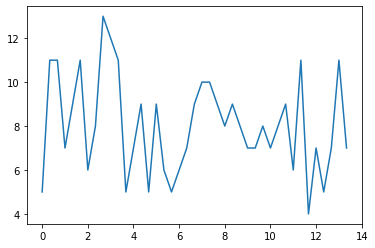

In [87]:
plt.plot(list_df['times'], list_df['people'], label = 'test')
plt.show()

# ノック89：人通りの変化を確認

In [88]:
print('分析を開始します')

cap = cv2.VideoCapture('mov/mov02.avi')
fps = cap.get(cv2.CAP_PROP_FPS)

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride' : (8, 8),
             'padding' : (32, 32),
             'scale' : 1.05,
             'hitThreshold' : 0,
             'finalThreshold' : 5}

num = 0
list_df2 = pd.DataFrame( columns = ['times', 'people'])

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num % 10 == 0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r =hog.detectMultiScale(gray, **hogParams)
            if (len(human) > 0):
                for (x, y, w, h) in human:
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 255, 255), 3)
            tmp_se = pd.Series([num/fps, len(human)], index = list_df2.columns)
            list_df2 = list_df2.append(tmp_se, ignore_index = True)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
    else:
        break
    num = num + 1
        
cap.release()
cv2.destroyAllWindows()
print('分析を修了しました')

分析を開始します
分析を修了しました


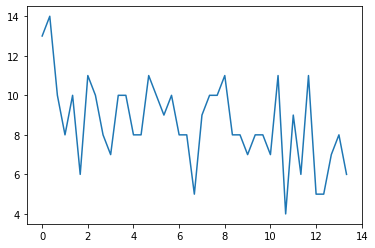

In [89]:
plt.plot(list_df2['times'], list_df2['people'], label = 'test')
plt.show()

# ノック90：移動平均で比較

In [90]:
import numpy as np

In [93]:
def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5)/float(5), mode = 'valid')
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    return x_dat, y_conv

In [95]:
np.ones(5)/float(5)

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [96]:
moving_average(list_df['times'], list_df['people'])

(array([ 0.        ,  0.37037037,  0.74074074,  1.11111111,  1.48148148,
         1.85185185,  2.22222222,  2.59259259,  2.96296296,  3.33333333,
         3.7037037 ,  4.07407407,  4.44444444,  4.81481481,  5.18518519,
         5.55555556,  5.92592593,  6.2962963 ,  6.66666667,  7.03703704,
         7.40740741,  7.77777778,  8.14814815,  8.51851852,  8.88888889,
         9.25925926,  9.62962963, 10.        , 10.37037037, 10.74074074,
        11.11111111, 11.48148148, 11.85185185, 12.22222222, 12.59259259,
        12.96296296, 13.33333333]),
 array([ 8.6,  9.8,  8.8,  8.2,  9.4, 10. , 10. ,  9.8,  9.6,  8.8,  7.4,
         7. ,  7.2,  6.8,  6.2,  6.6,  6.6,  7.4,  8.4,  9. ,  9.2,  9.2,
         8.8,  8.2,  7.8,  7.8,  7.4,  7.4,  7.8,  7.6,  8.2,  7.6,  7.4,
         6.6,  6.8,  6.8,  7.4]))

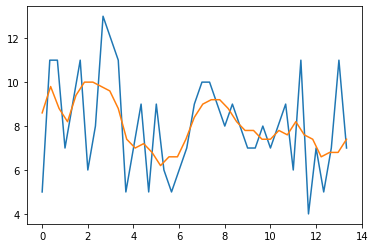

In [98]:
plt.plot(list_df['times'], list_df['people'], label = 'raw')
ma_x, ma_y = moving_average(list_df['times'], list_df['people'])
plt.plot(ma_x, ma_y, label = 'average')

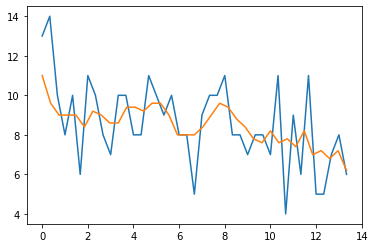

In [99]:
plt.plot(list_df2['times'], list_df2['people'], label = 'raw')
ma_x2, ma_y2 = moving_average(list_df2['times'], list_df2['people'])
plt.plot(ma_x2, ma_y2, label = 'average')

(0.0, 15.0)

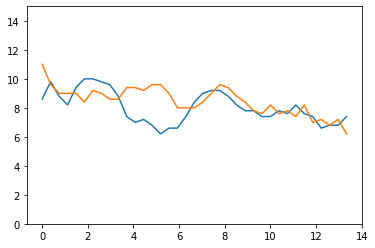

In [101]:
plt.plot(ma_x, ma_y, label = 'average')
plt.plot(ma_x2, ma_y2, label = 'average')
plt.ylim(0,15)